In [1]:
#import library
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
import numpy as np  
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #chuan cua ANN
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical #  de dam bao do chinh xac cao 
from keras import callbacks 
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong

In [3]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=20,
                                                 directory='../input/traindoan/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=20,
                                                 directory='../input/testmonan/test',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 287 images belonging to 10 classes.
Found 10 images belonging to 10 classes.


In [4]:
train_dataset.classes
train_dataset.class_indices

{'banhbeo': 0,
 'banhcuon': 1,
 'banhmi': 2,
 'banhxeo': 3,
 'canhchua': 4,
 'com': 5,
 'mitom': 6,
 'pho': 7,
 'raumuongxao': 8,
 'thitheoquay': 9}

In [5]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

2022-05-24 14:02:03.692895: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=30,epochs=100,verbose=1,
                  validation_data=validation_dataset)

2022-05-24 14:02:04.477509: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
15/15 [==============================] - 19s 1s/step - loss: 2.6804 - accuracy: 0.1150 - val_loss: 2.2235 - val_accuracy: 0.2000
Epoch 2/100
15/15 [==============================] - 17s 1s/step - loss: 2.1521 - accuracy: 0.2334 - val_loss: 1.9344 - val_accuracy: 0.6000
Epoch 3/100
15/15 [==============================] - 17s 1s/step - loss: 1.6994 - accuracy: 0.4564 - val_loss: 1.1316 - val_accuracy: 0.8000
Epoch 4/100
15/15 [==============================] - 17s 1s/step - loss: 1.2572 - accuracy: 0.5889 - val_loss: 1.1509 - val_accuracy: 0.7000
Epoch 5/100
15/15 [==============================] - 17s 1s/step - loss: 0.8894 - accuracy: 0.7073 - val_loss: 0.5063 - val_accuracy: 0.8000
Epoch 6/100
15/15 [==============================] - 17s 1s/step - loss: 0.7238 - accuracy: 0.7526 - val_loss: 0.4836 - val_accuracy: 0.7000
Epoch 7/100
15/15 [==============================] - 17s 1s/step - loss: 0.5958 - accuracy: 0.7909 - val_loss: 0.3643 - val_accuracy: 0.8000
Epoch 8/100
1

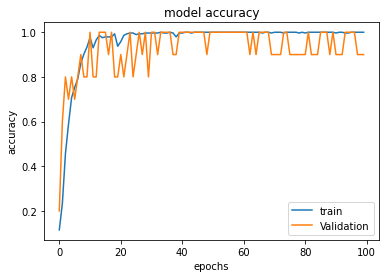

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [10]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.5263164639472961
Độ chính xác  0.8999999761581421


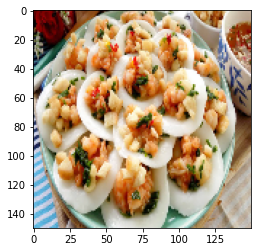

Bánh bèo


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/banhbeo/banhbeo (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

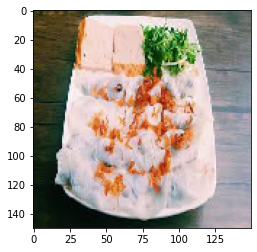

Bánh cuốn 


In [12]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/banhcuon/banhcuon (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

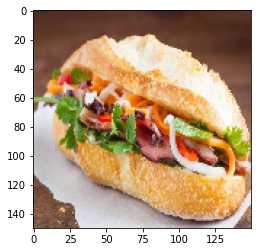

Bánh mì 


In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/banhmi/banhmi (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

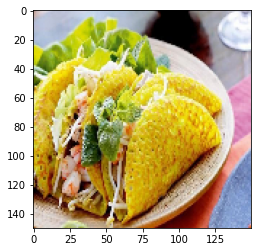

Bánh xèo


In [14]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/banhxeo/banhxeo (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

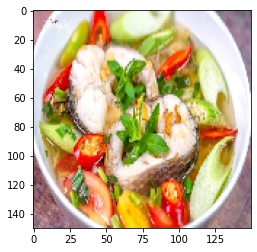

Canh chua


In [15]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/canhchua/canhchua (19).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

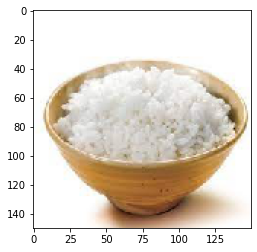

Cơm


In [16]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/com/com (18).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

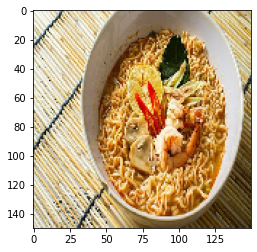

Mì Tôm


In [17]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/mitom/mitom (10).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

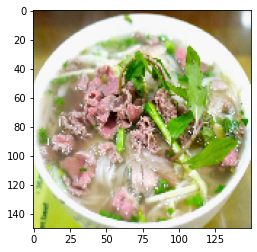

Phở


In [18]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/pho/pho_0 (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

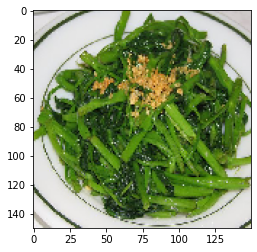

Rau muống xào


In [19]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/raumuong/raumuong (14).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

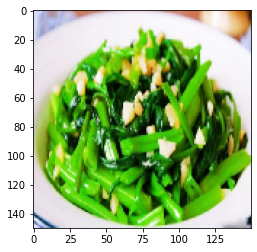

Rau muống xào


In [20]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/raumuong/raumuong (15).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

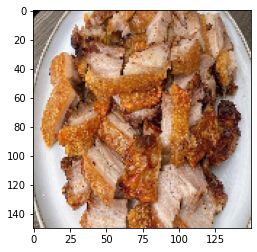

Bánh xèo


In [21]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/thitheoquay/thitheoquay (49).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")

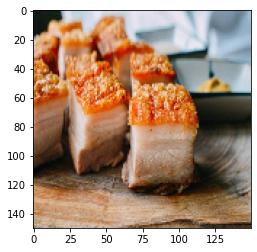

Thịt heo quay


In [22]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testmonan/test/thitheoquay/thitheoquay (50).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh bèo")
if(kq==1):
    print("Bánh cuốn ")
if(kq==2):
    print("Bánh mì ")
if(kq==3):
    print("Bánh xèo")    
if(kq==4):
    print("Canh chua")
if(kq==5):
    print("Cơm")
if(kq==6):
    print("Mì Tôm")
if(kq==7):
    print("Phở")
if(kq==8):
    print("Rau muống xào")
if(kq==9):
    print("Thịt heo quay")